In [1]:
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt
import bisect

In [36]:
# build function for each scenario 
def v_1(y):  
    if y < 5 or y > 20:
        return float('inf')
    elif 5 <= y < 6.53:
        return 2.5 * y - 10 * (2 * y - 10)
    else:
        return 2.5 * y - 10 * 20 / y


def v_2(y): 
    if y < 2.22 or y > 20:
        return float('inf')
    elif 2.22 <= y < 3.49:
        return 2.5 * y - 20 * (4.5 * y - 10)
    else:
        return 2.5 * y - 20 * 20 / y

v_list = [v_1, v_2]

In [37]:
# set up parameters and solvers
n_samples = 10
xlb = 6
xub = 15
ylb = 6
yub = 15

tolerance=1e-9
solverscip = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
solverscip.options['numerics/feastol'] = tolerance
solverscip.options['numerics/dualfeastol'] = tolerance
solverscip.options['limits/gap'] = tolerance

In [58]:
m1 = ConcreteModel()
m1.y = Var(bounds=(ylb, yub))
m1.x1 = Var(bounds=(0, None))        ##################################
m1.c1 = Constraint(expr= 2*m1.y-m1.x1>=10)
m1.c2 = Constraint(expr= m1.x1 * m1.y<=20)
#m1.c3 = Constraint(expr= 2*sqrt(m1.x1+5)*log(m1.x1+2) <= 35)
m1.obj_expr = Expression(expr=2.5*m1.y - 10*m1.x1)


y_nodes1 = [6.,6.53007288,6.53112887,8.24999999968014,8.25,10.5,12.75,15]
y_nodes1 = [6.,6.53007288,6.53112887,8.25,10.5,12.75,15]
as_nodes1 = [v_1(y) for y in y_nodes1]


m1.As1 = Var()
m1.pw = Piecewise(
    m1.As1, m1.y,
    pw_pts=y_nodes1,
    f_rule=as_nodes1,
    pw_constr_type='EQ',
    pw_repn='SOS2'
)

m1.obj = Objective(expr=m1.obj_expr - m1.As1, sense=minimize)

results = solverscip.solve(m1)
print(value(m1.y))
ccc = results.problem.lower_bound
print(ccc)

10.50000000680915
-5.28336086522727e-09


In [53]:
m1 = ConcreteModel()
m1.y = Var(bounds=(ylb, yub))
m1.x1 = Var(bounds=(0, None))        ##################################
m1.c1 = Constraint(expr= 2*m1.y-m1.x1>=10)
m1.c2 = Constraint(expr= m1.x1 * m1.y<=20)
#m1.c3 = Constraint(expr= 2*sqrt(m1.x1+5)*log(m1.x1+2) <= 35)
m1.obj_expr = Expression(expr=2.5*m1.y - 10*m1.x1)


y_nodes = np.linspace(ylb, yub, n_samples).tolist()    ##################################
y_nodes2 = [ 6.,6.53007288  ,6.53112887  ,8.25        ,8.25       ,10.5,12.75,15.]
as_nodes2 = [v_1(y) for y in y_nodes2]

m1.As2 = Var()
m1.pw = Piecewise(
    m1.As2, m1.y,
    pw_pts=y_nodes2,
    f_rule=as_nodes2,
    pw_constr_type='EQ',
    pw_repn='SOS2'
)

m1.obj = Objective(expr=m1.obj_expr - m1.As2, sense=minimize)

results = solverscip.solve(m1)
print(value(m1.y))
ccc = results.problem.lower_bound
print(ccc)

8.249999990952167
-1.69337118988554e-08


In [33]:
results = solverscip.solve(m1)
ccc = results.problem.lower_bound
ccc

-6.07004427599171

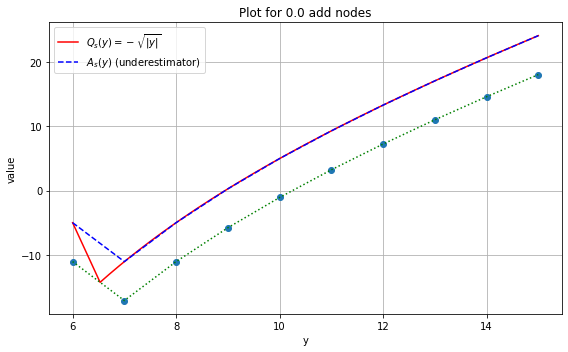

In [34]:
# y and z = |y|
y_vals = np.linspace(ylb, yub, 1001)
Qs_vals = [v_1(y) for y in y_vals]

#print("ms value is ",results[i][4])
#print("y_opt value is ",results[i][5])
#z_nodes = abs(y_nodes)
#as_nodes = np.sqrt(z_nodes)
aaa = y_nodes
bbb = as_nodes
bbb2 = np.array(bbb)
#As_vals2 = np.interp(z_vals, aaa, bbb2)
#As_shifted_vals2 = As_vals2 + ccc

# make the plot
plt.figure(figsize=(8, 5))
plt.plot(y_vals, Qs_vals, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
#plt.plot(y_vals, As_vals2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
plt.plot(aaa, bbb2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
#plt.plot(y_vals, As_shifted_vals2, label=r'$A_s(y) + m_s$', color='green', linestyle=':')
plt.plot(aaa, bbb2+ccc, 'o')
plt.plot(aaa, bbb2+ccc, color='green', linestyle=':')
plt.xlabel('y')
plt.ylabel('value')
#plt.title('Correct: $A_s(y) + m_s$ is a global underestimator of $Q_s(y)$')
plt.title(f"Plot for {0:.1f} add nodes")
plt.legend()
plt.grid(True)
#plt.xlim(-0.2, 0.2)  
#plt.ylim(-0.5, 0)  

plt.tight_layout()

In [29]:
aaa

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]





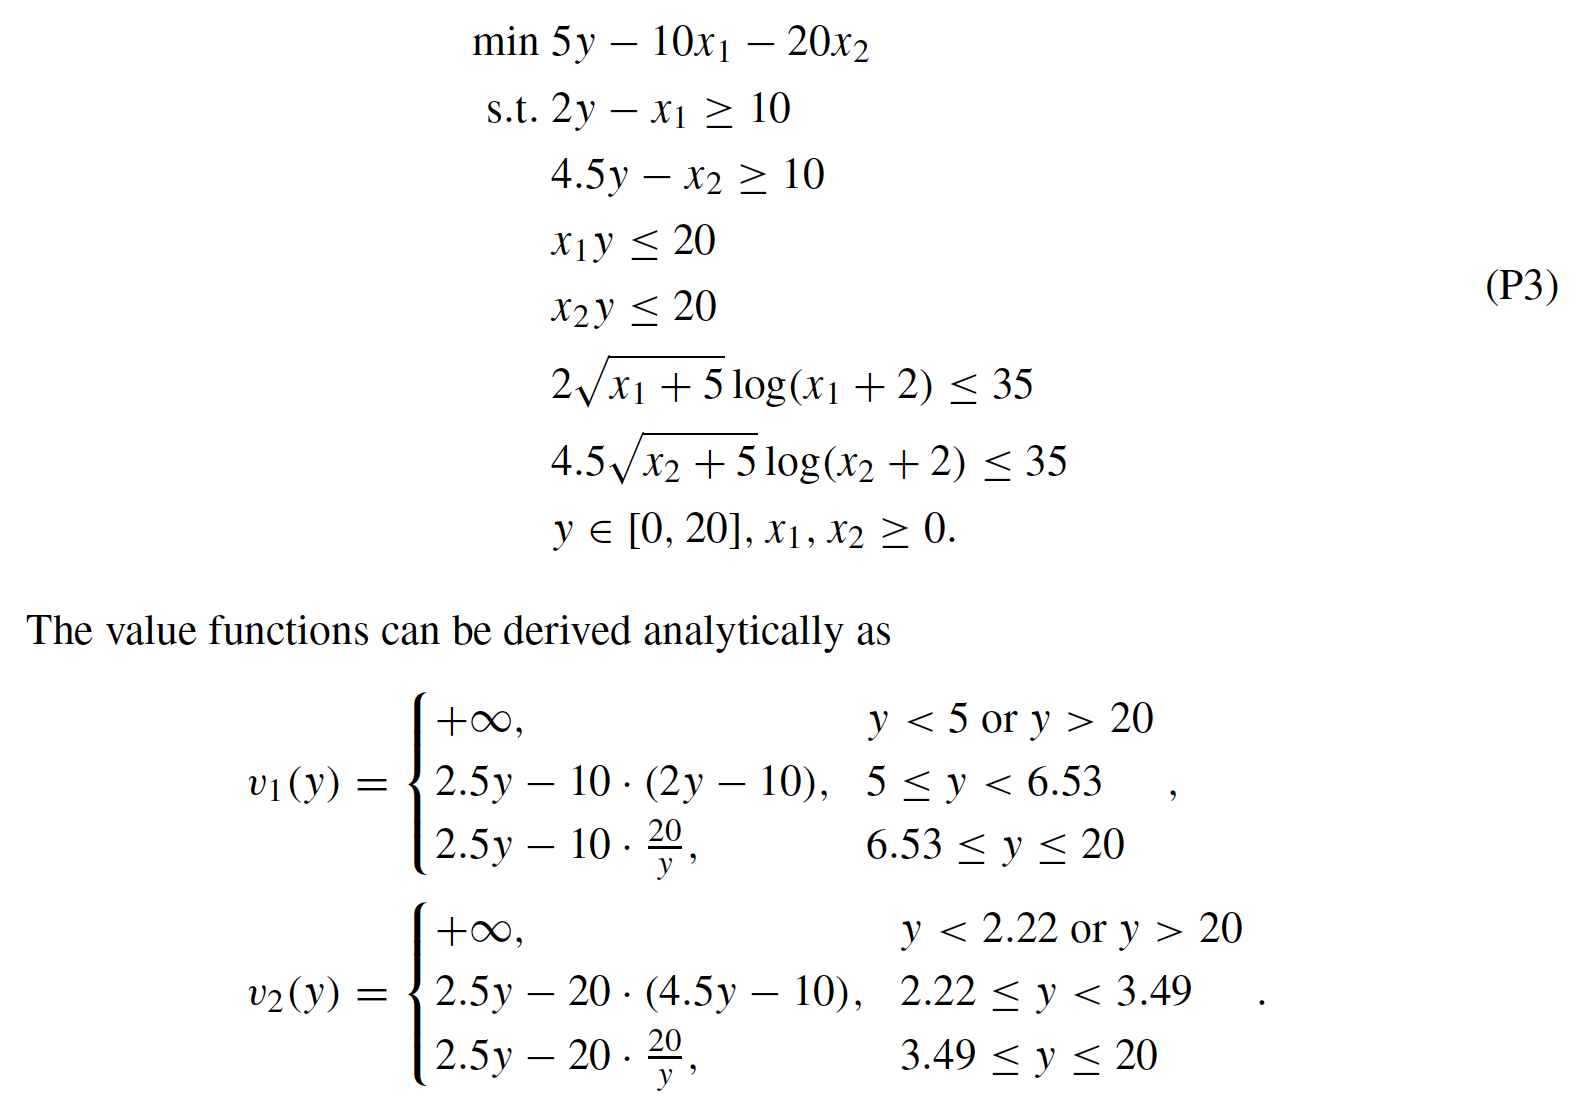

In [3]:
delta = 1
add_node_num=40
n_samples=5
tolerance=1e-9

solver = SolverFactory('gurobi')
solver.options['FeasibilityTol'] = 1e-9
solver.options['OptimalityTol'] = tolerance
solver.options['NonConvex'] = 2 

In [4]:
# build function for each scenario 
def v_1(y):  
    if y < 5 or y > 20:
        return float('inf')
    elif 5 <= y < 6.53:
        return 2.5 * y - 10 * (2 * y - 10)
    else:
        return 2.5 * y - 10 * 20 / y


def v_2(y): 
    if y < 2.22 or y > 20:
        return float('inf')
    elif 2.22 <= y < 3.49:
        return 2.5 * y - 20 * (4.5 * y - 10)
    else:
        return 2.5 * y - 20 * 20 / y

v_list = [v_1, v_2]

# build model for each scenario 
m1 = ConcreteModel()
m1.y = Var(bounds=(0, 20))
m1.x1 = Var(bounds=(0, None))
m1.c1 = Constraint(expr= 2*m1.y-m1.x1>=10)
m1.c2 = Constraint(expr= m1.x1 * m1.y<=20)
m1.c3 = Constraint(expr= 2*sqrt(m1.x1+5)*log(m1.x1+2) <= 35)
m1.obj = Objective(expr= 2.5*m1.y - 10*m1.x1, sense=minimize)
m1.obj_expr = Expression(expr=-m1.x1)

m2 = ConcreteModel()
m2.y = Var(bounds=(0, 20))
m2.x2 = Var(bounds=(0, None))
m2.c1 = Constraint(expr= 4.5*m2.y-m2.x2>=10)
m2.c2 = Constraint(expr= m2.x2 * m2.y<=20)
m2.c3 = Constraint(expr= 4.5*sqrt(m2.x2+5)*log(m2.x2+2) <= 35)
m2.obj = Objective(expr=m2.x2 - 1, sense=minimize)

model_list = [m1, m2]

In [11]:
results = solverscip.solve(m1)
results.problem.lower_bound

-14.2947552985781

In [ ]:
m1.obj = Objective(expr=m1.obj_expr - m1.As, sense=minimize)
#'''
if k == 50:
    print('  ')
    print("16start")
    results = solver.solve(m1,tee = True)
    print(y_nodes)
    aaa = y_nodes
    bbb = as_nodes
    ccc = results.problem.lower_bound
    print("16end")
    print('  ')
#'''


results = solver.solve(m1)
ms_1 = results.problem.lower_bound
new_node = value(m1.y)
print('new node is ',new_node)
print('ms is ',ms_1)
print('x1 is ',value(m1.x1))
print('x2 is ',value(m1.x2))
print(m1.x1)
print(' ')
print(' ')

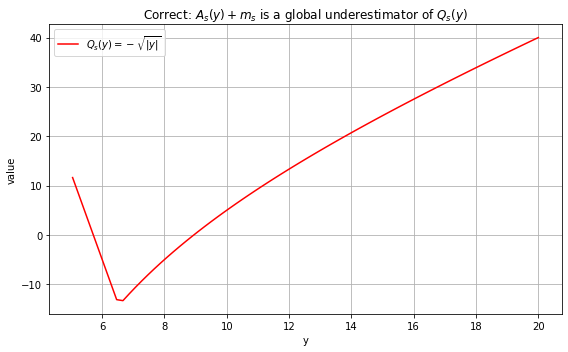

In [7]:
# y and z = |y|
y_vals = np.linspace(0, 20, 100)


# define Qs(y)
Qs_vals1 = [v_1(y) for y in y_vals]




# make the plot
plt.figure(figsize=(8, 5))
plt.plot(y_vals, Qs_vals1, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
plt.xlabel('y')
plt.ylabel('value')
plt.title('Correct: $A_s(y) + m_s$ is a global underestimator of $Q_s(y)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# y and z = |y|
y_vals = np.linspace(-delta, delta, 1001)
z_vals = np.abs(y_vals)

# define Qs(y)
Qs_vals2 = -np.sqrt(z_vals)

# As(y)
print("   ")
print("   ")
print("   ")
print('y node is ',aaa)
print('y node length',len(aaa))
print('ms is ',-ccc)
#print("ms value is ",results[i][4])
#print("y_opt value is ",results[i][5])
#z_nodes = abs(y_nodes)
#as_nodes = np.sqrt(z_nodes)
bbb2 = np.array(bbb)
#As_vals2 = np.interp(z_vals, aaa, bbb2)
#As_shifted_vals2 = As_vals2 + ccc

# make the plot
plt.figure(figsize=(8, 5))
plt.plot(y_vals, Qs_vals2, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
#plt.plot(y_vals, As_vals2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
plt.plot(aaa, bbb2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
#plt.plot(y_vals, As_shifted_vals2, label=r'$A_s(y) + m_s$', color='green', linestyle=':')
plt.plot(aaa, bbb2+ccc, 'o')
plt.plot(aaa, bbb2+ccc, color='green', linestyle=':')
plt.xlabel('y')
plt.ylabel('value')
#plt.title('Correct: $A_s(y) + m_s$ is a global underestimator of $Q_s(y)$')
plt.title(f"Plot for {0:.1f} add nodes")
plt.legend()
plt.grid(True)
plt.xlim(-0.2, 0.2)  
plt.ylim(-0.5, 0)  

plt.tight_layout()

In [11]:
def compute_piecewise_hausdorff(delta, v_list, model_list, add_node_num=0, n_samples=5, tolerance=1e-8):
    """
    Parameters:
        delta (float): range of variable
        n_samples (float): number of sample nodes
        v_list (list): list of scenario functions  
        model: model with submodels corresponds to each scenario
        tolerance (float): decide when to stop

    Returns: delta (float): delta
             errors (float): hausdorff error
             y_nodes (list): y node (to make plot)
             as_nodes_list[0] (list): As node value (to make plot)
             ms_list[0] (float): ms for first scenario (to make plot)
    """
    N = len(model_list)
    y_nodes = np.linspace(0, delta, n_samples).tolist()
    lst = np.ones(N).tolist() 
    y_opt_list = np.ones(N).tolist() 
    as_nodes_list = np.ones(N).tolist() 
    ms_list = np.ones(N).tolist() 
    
    # reset bounds
    for i in range(N):
        #model_list[i].y.setlb(-delta)
        model_list[i].y.setub(delta)
    
    for _ in range(add_node_num+1):
        if y_opt_list != lst:
            for j in range(len(y_opt_list)):
                bisect.insort(y_nodes, y_opt_list[j])
        for i in range(N):
            as_nodes_list[i] = [v_list[i](y) for y in y_nodes]
        
        # define piecewise function for each scenario
        for i in range(N):
            model_list[i].As = Var()
            model_list[i].pw = Piecewise(
                model_list[i].As, model_list[i].y,
                pw_pts=y_nodes,
                f_rule=as_nodes_list[i],
                pw_constr_type='EQ',
                pw_repn='INC'
            )

        # start to solve the submodels
        solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
        solver.options['numerics/feastol'] = tolerance
        solver.options['numerics/dualfeastol'] = tolerance
        solver.options['limits/gap'] = tolerance
        
        for i in range(N):
            original_expr = model_list[i].obj.expr
            model_list[i].obj.deactivate()          
            model_list[i].obj2 = Objective(expr=original_expr - model_list[i].As, sense=minimize)
            solver.solve(model_list[i])
            # get the ms value
            ms_list[i] = value(model_list[i].obj2)
            y_opt_list[i] = value(model_list[i].y)
            as_nodes_list[i] = [v_list[i](y) for y in y_nodes]
    
    
    # define and solve the sum model
    assum_nodes = np.sum(as_nodes_list, axis=0).tolist()
    model_sum = ConcreteModel()
    model_sum.y = Var(bounds=(0, delta))
    model_sum.As = Var()
    model_sum.pw = Piecewise(
        model_sum.As, model_sum.y,
        pw_pts=y_nodes,
        f_rule=assum_nodes,
        pw_constr_type='EQ',
        pw_repn='INC'
    )
    model_sum.obj = Objective(expr = model_sum.As, sense=minimize)
    solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
    solver.options['numerics/feastol'] = tolerance
    solver.options['numerics/dualfeastol'] = tolerance
    solver.options['limits/gap'] = tolerance
    solver.solve(model_sum)
    results = solver.solve(model_sum)
    if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
        pass
    else:
        print("bad bad bad")
    # get the output
    errors = value(model_sum.obj) + sum(ms_list)
    errors = -errors
    
    #return delta, errors, 1, 2  # diameter, error
    return delta, errors, y_nodes, as_nodes_list[0], ms_list[0]

In [13]:
adds = np.array([0, 1, 2, 3])
d = 5
results = [compute_piecewise_hausdorff(d,v_list,model_list,a) for a in adds]

'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'

ValueError: No value for uninitialized NumericValue object y

In [92]:
# make delta list
##deltas = np.array([1, 1e-1, 1e-2,1e-03, 1e-4, 1e-5])
adds = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
d = 1
results = [compute_piecewise_hausdorff(d,v_list,model_list,a) for a in adds]

'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block

/opt/anaconda3/lib/python3.9/site-packages/pyomo/core/base/piecewise.py:165: RuntimeWarning: invalid value encountered in double_scalars
  (values[i] - values[i - 1]) / (points[i] - points[i - 1])


AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
-1.861301886836598e-10
5050500505050505050500505
[[-1.0, -1.0, -0.7071067811865476, -0.353553390608555, -0.0, -0.7071067811865476, -1.0], [1.0, 1.0, 0.7071067811865476, 0.353553390608555, 0.0, 0.7071067811865476, 1.0]]
22222202020200202020202
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
bad bad bad
bad bad bad
[-0.1767766955217851, -1.861301886836598e-10]
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<clas

bad bad bad
bad bad bad
[-0.08838836190937355, -7.0723122718056895e-06]
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
u

**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.objective.Sca

**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.objective.Sca

'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this wa

'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
-0.08838273099257396
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjectiv

'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
-0.1767766953255643
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.b

**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
-0.08838273099257396
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
-7.072311414356619e-06
'pyomo.core.base.var.ScalarVar'>) on

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
3.2041036490682018e-12
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
-3.2041036490682018e-12
5050500505050505050500505
[[-1.0, -1.0, -0.7071067811865476, -0.353553390608555, -0.17676264828082855, -8.14681391173075e-06, -7.493345929303892e-06, -7.493343419611306e-06, -7.493343419611306e-06, -7.493342725105479e-06, -0.0, -0.08838339286038624, -0.1767875119121775, -0.3535534403419899, -0.5303301394470284, -0.7071067811865476, -1.0], [1.0, 1.0, 0.7071067811865476, 0.353553390608555, 0.17676264828082855, 8.14681391173075e-06, 7.493345929303892e-06, 7.493343419611306e-06, 7.493343419611306e-06, 7.493342725105479e-06, 

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
-0.08838836190937355
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
-7.0723122718056895e-06
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARN

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
-7.493240372725991e-06
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicati

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
0.0
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling e

'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.ad

**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.objective.Sca

'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.ad

**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.objective.Sca

'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
**WARNING: Piecewise component 'pw[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
3.2041036490682018e-12
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObject

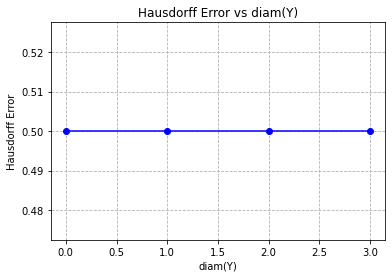

add_nodes 	    error
0.000	0.500000000000000
1.000	0.500000000000000
2.000	0.500000000000000
3.000	0.500000000000000
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
0
[-1.  -0.5  0.   0.5  1. ]
5
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
1
[-1.  -0.5 -0.5  0.   0.5  1.   1. ]
7
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
2
[-1.  -0.5 -0.5 -0.5  0.   0.5  1.   1.   1. ]
9
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
3
[-1.         -0.5        -0.5        -0.5        -0.5        -0.21428571
  0.          0.5         1.          1.          1.        ]
11


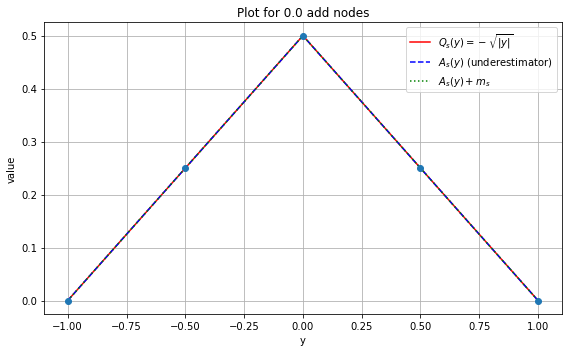

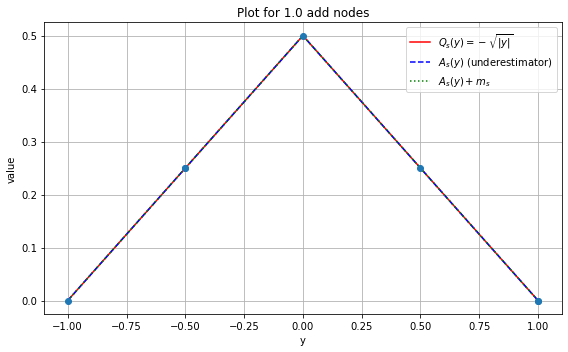

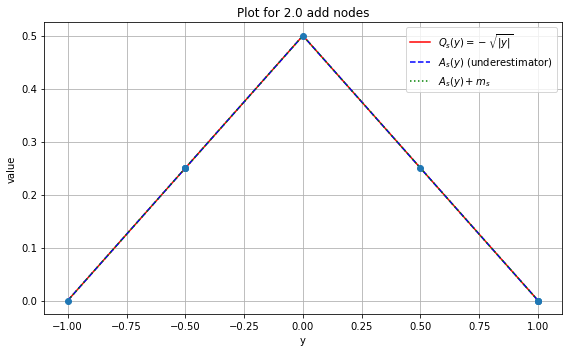

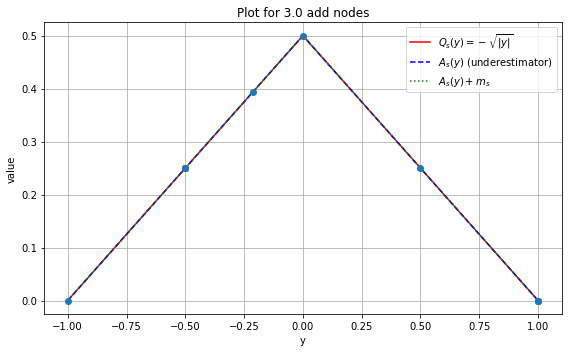

In [12]:
# make the plot
plt.figure()
#diameters, errors = zip(*results)
diameters, errors = zip(*[(r[0], r[1]) for r in results])

plt.plot(adds, errors, marker='o', color='blue')
plt.xlabel("diam(Y)")
plt.ylabel("Hausdorff Error")
plt.title("Hausdorff Error vs diam(Y)")
plt.grid(True, which="both", ls="--")
plt.show()

print("add_nodes \t    error")
for i in range(len(errors)):
    print(f"{adds[i]:.3f}\t{errors[i]:.15f}")
    


for i in range(len(results)):
    # y and z = |y|
    y_vals = np.linspace(-d, d, 100)

    # define Qs(y)
    Qs_vals2 = v_1(y_vals)

    # As(y)
    y_nodes = np.array(results[i][2])
    print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
    print(i)
    print(y_nodes)
    print(len(y_nodes))
    z_nodes = abs(y_nodes)
    #as_nodes = np.sqrt(z_nodes)
    as_nodes = np.array(results[i][3])
    As_vals2 = np.interp(z_vals, y_nodes, as_nodes)
    As_shifted_vals2 = As_vals2 + results[i][4]

    # make the plot
    plt.figure(figsize=(8, 5))
    plt.plot(y_vals, Qs_vals2, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
    plt.plot(y_vals, As_vals2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
    plt.plot(y_vals, As_shifted_vals2, label=r'$A_s(y) + m_s$', color='green', linestyle=':')
    plt.plot(y_nodes, as_nodes+results[i][4], 'o')
    plt.xlabel('y')
    plt.ylabel('value')
    #plt.title('Correct: $A_s(y) + m_s$ is a global underestimator of $Q_s(y)$')
    plt.title(f"Plot for {i:.1f} add nodes")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.show()

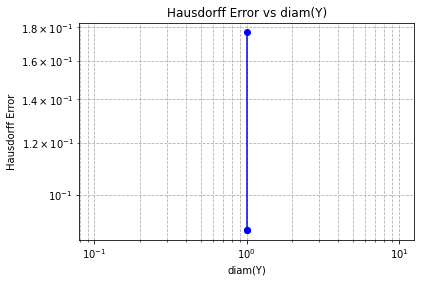

delta 	    error


ValueError: too many values to unpack (expected 2)

In [78]:
# make the plot
plt.figure()
#diameters, errors = zip(*results)
diameters, errors = zip(*[(r[0], r[1]) for r in results])

plt.loglog(diameters, errors, marker='o', color='blue')
plt.xlabel("diam(Y)")
plt.ylabel("Hausdorff Error")
plt.title("Hausdorff Error vs diam(Y)")
plt.grid(True, which="both", ls="--")
plt.show()

print("delta \t    error")
for a, b in results:
    print(f"{a:.6f}\t{b:.15f}")

In [59]:
# make the plot
plt.figure()
#diameters, errors = zip(*results)
diameters, errors = zip(*[(r[0], r[1]) for r in results])

plt.loglog(diameters, errors, marker='o', color='blue')
plt.xlabel("diam(Y)")
plt.ylabel("Hausdorff Error")
plt.title("Hausdorff Error vs diam(Y)")
plt.grid(True, which="both", ls="--")
plt.show()

print("delta \t    error")
for a, b in results:
    print(f"{a:.6f}\t{b:.15f}")
    



for i in range(3):
    # y and z = |y|
    y_vals = np.linspace(-diameters[i], diameters[i], 100)
    z_vals = np.abs(y_vals)

    # define Qs(y)
    Qs_vals2 = np.sqrt(z_vals)

    # As(y)
    y_nodes = np.array(aaa[i])
    z_nodes = abs(y_nodes)
    as_nodes = np.sqrt(z_nodes)
    As_vals2 = np.interp(z_vals, y_nodes, as_nodes)
    As_shifted_vals2 = As_vals2 + bbb[i]

    # make the plot
    plt.figure(figsize=(8, 5))
    plt.plot(y_vals, Qs_vals2, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
    plt.plot(y_vals, As_vals2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
    plt.plot(y_vals, As_shifted_vals2, label=r'$A_s(y) + m_s$', color='green', linestyle=':')
    plt.xlabel('y')
    plt.ylabel('value')
    plt.title('Correct: $A_s(y) + m_s$ is a global underestimator of $Q_s(y)$')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.show()

ValueError: too many values to unpack (expected 4)

<Figure size 432x288 with 0 Axes>

'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this warning, use
block

'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this wa

'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this wa

'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.piecewise.SimplePiecewise'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.piecewise.SimplePiecewise'>). This is
usually indicative of a modelling error. To avoid this wa

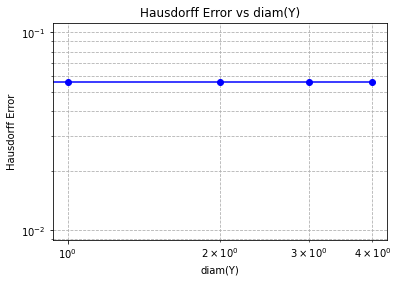

delta 	    error
0.100000	0.055901713663221
0.100000	0.055901713663221
0.100000	0.055901713663221
0.100000	0.055901713663221
0.100000	0.055901713663221


In [32]:
# make delta list
#deltas = np.array([1, 1e-1, 1e-2,1e-03, 1e-4, 1e-5])
its = np.array([0,1,2,3,4])
results = [compute_piecewise_hausdorff(0.1,v_list,model_list,d,5,1e-10) for d in its]

# make the plot
diameters, errors = zip(*results)
plt.loglog(its, errors, marker='o', color='blue')
plt.xlabel("diam(Y)")
plt.ylabel("Hausdorff Error")
plt.title("Hausdorff Error vs diam(Y)")
plt.grid(True, which="both", ls="--")
plt.show()

print("delta \t    error")
for a, b in results:
    print(f"{a:.6f}\t{b:.15f}")

**WARNING: Piecewise component 'pw3[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
**WARNING: Piecewise component 'pw3[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
**WARNING: Piecewise component 'pw3[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
**WARNING: Piecewise component 'pw3[(None,)]' has detected slopes of consecutive piecewise segments to be within 1e-08 of one another. Refer to the Piecewise help documentation for information on how to disable this warning.
**WARNING: Piecewise component 'pw3[(None,)]' has detected slopes of consecutive piecewise segments 

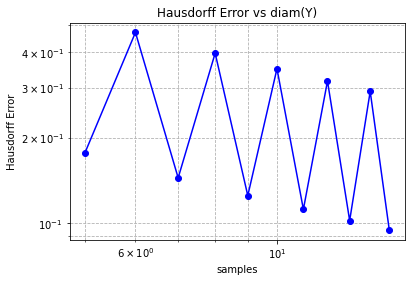

delta 	    error
1.000000	0.176776720764951
1.000000	0.469144111976009
1.000000	0.144337658587362
1.000000	0.396499147876172
1.000000	0.125000079453145
1.000000	0.349679380522178
1.000000	0.111803506425908
1.000000	0.316296924270163
1.000000	0.102062104534555
1.000000	0.290950863023780
1.000000	0.094491255798852


In [132]:
samples = np.array([5,6,7,8,9,10,11,12,13,14,15])
results = [compute_piecewise_hausdorff(1,s) for s in samples]

# make the plot
delta, errors = zip(*results)
plt.loglog(samples, errors, marker='o', color='blue')
plt.xlabel("samples")
plt.ylabel("Hausdorff Error")
plt.title("Hausdorff Error vs diam(Y)")
plt.grid(True, which="both", ls="--")
plt.show()

print("delta \t    error")
for a, b in results:
    print(f"{a:.6f}\t{b:.15f}")

# check 1e-03

In [135]:
# define basic things
delta = 1e-04
n_samples = 5

y_nodes = np.linspace(-delta, delta, n_samples).tolist()
as_nodes = [-np.sqrt(abs(y)) for y in y_nodes]

# create model
model = ConcreteModel()
model.x1 = Var(bounds=(0, 1))
model.y = Var(bounds=(-delta, delta))

# define piecewise function
model.As = Var()
model.pw = Piecewise(
    model.As, model.y,
    pw_pts=y_nodes,
    f_rule=as_nodes,
    pw_constr_type='EQ',
    pw_repn='INC'
)

# set up constraint
model.eq = Constraint(expr=model.x1**4 == model.y**2)

# define objective function and solve the model
model.obj = Objective(expr= -model.x1 - model.As, sense=minimize)
solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
aa = 1e-9
solver.options['numerics/feastol'] = aa
solver.options['numerics/dualfeastol'] = aa
solver.options['limits/gap'] = aa
solver.solve(model)

# print the output
x1_opt = value(model.x1)
y_opt = value(model.y)
as_val = value(model.As)
m_s1 = value(model.obj)
print(f"x1 = {x1_opt:.4f}, y = {y_opt:.4f}, A_s(y) = {as_val:.4f}, m_s = {m_s1:.4f}")

x1 = 0.0052, y = 0.0000, A_s(y) = 0.0000, m_s = -0.0052


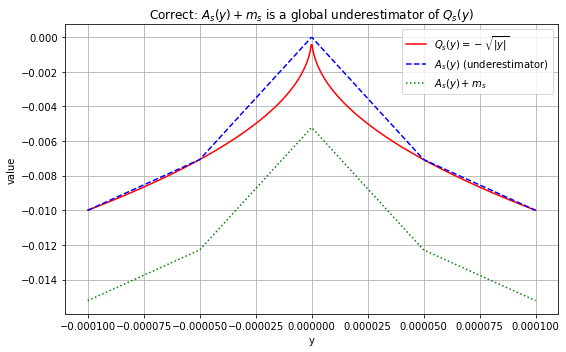

In [136]:
# y and z = |y|
y_vals = np.linspace(-delta, delta, 500)
z_vals = np.abs(y_vals)

# define Qs(y)
Qs_vals1 = -np.sqrt(z_vals)

# As(y)
y_nodes = np.array(y_nodes)
z_nodes = abs(y_nodes)
as_nodes = -np.sqrt(z_nodes)
As_vals1 = np.interp(z_vals, y_nodes, as_nodes)
# As + ms
As_shifted_vals1 = As_vals1 + m_s1

# make the plot
plt.figure(figsize=(8, 5))
plt.plot(y_vals, Qs_vals1, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
plt.plot(y_vals, As_vals1, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
plt.plot(y_vals, As_shifted_vals1, label=r'$A_s(y) + m_s$', color='green', linestyle=':')
plt.xlabel('y')
plt.ylabel('value')
plt.title('Correct: $A_s(y) + m_s$ is a global underestimator of $Q_s(y)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# define sampling nodes
y_nodes = np.linspace(-delta, delta, n_samples).tolist()
as_nodes = [np.sqrt(abs(y)) for y in y_nodes]


# define model
model = ConcreteModel()
model.x2 = Var(bounds=(0, 1))
model.y = Var(bounds=(-delta, delta))

# define piecewise function
model.As = Var()
model.pw = Piecewise(
    model.As, model.y,
    pw_pts=y_nodes,
    f_rule=as_nodes,
    pw_constr_type='EQ',
    pw_repn='INC'
)

# set up constraint
model.c1 = Constraint(expr=model.x2**2 >= model.y)
model.c2 = Constraint(expr=model.x2**2 >= -model.y)

# define objective function and solve the model
model.obj = Objective(expr=model.x2 - model.As, sense=minimize)
solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
solver.solve(model)

# print the output
x2_opt = value(model.x2)
y_opt = value(model.y)
as_val = value(model.As)
m_s2 = value(model.obj)
print(f"x2 = {x2_opt:.4f}, y = {y_opt:.4f}, A_s(y) = {as_val:.4f}, m_s = {m_s2:.4f}")

x2 = 0.0223, y = 0.0005, A_s(y) = 0.0224, m_s = -0.0000


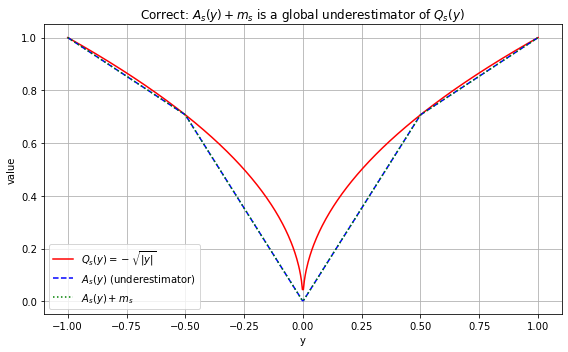

In [52]:
# y and z = |y|
y_vals = np.linspace(-1, 1, 500)
z_vals = np.abs(y_vals)

# define Qs(y)
Qs_vals2 = np.sqrt(z_vals)

# As(y)
y_nodes = np.array([-1.0, -0.5, 0.0, 0.5, 1.0])
z_nodes = abs(y_nodes)
as_nodes = np.sqrt(z_nodes)
As_vals2 = np.interp(z_vals, y_nodes, as_nodes)
As_shifted_vals2 = As_vals2 + m_s2

# make the plot
plt.figure(figsize=(8, 5))
plt.plot(y_vals, Qs_vals2, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
plt.plot(y_vals, As_vals2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
plt.plot(y_vals, As_shifted_vals2, label=r'$A_s(y) + m_s$', color='green', linestyle=':')
plt.xlabel('y')
plt.ylabel('value')
plt.title('Correct: $A_s(y) + m_s$ is a global underestimator of $Q_s(y)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

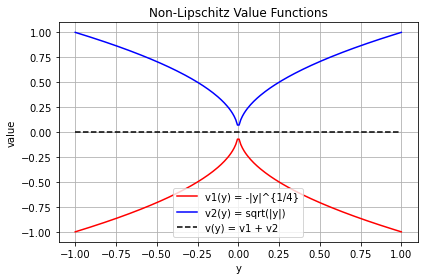

In [2]:
# first plot general diagram of v1(y), v2(y)
y_vals = np.linspace(-1, 1, 200)
v1_list, v2_list, v_total_list = [], [], []

# Initialize the solver
solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')

for y in y_vals:
    # Scenario 1：v1(y) = -|y|^{1/4}
    model1 = ConcreteModel()
    model1.x1 = Var(bounds=(0, 1))
    model1.obj = Objective(expr=-model1.x1, sense=minimize)
    model1.eq = Constraint(expr=model1.x1**4 == y**2)
    
    try:
        result1 = solver.solve(model1, tee=False)
        v1 = value(model1.obj)
    except:
        v1 = np.nan

    # Scenario 2：v2(y) = sqrt(|y|)
    model2 = ConcreteModel()
    model2.x2 = Var(bounds=(0, 1))
    model2.obj = Objective(expr=model2.x2, sense=minimize)
    model2.con1 = Constraint(expr=model2.x2**2 >= y)
    model2.con2 = Constraint(expr=model2.x2**2 >= -y)
    
    try:
        result2 = solver.solve(model2, tee=False)
        v2 = value(model2.obj)
    except:
        v2 = np.nan

    # combine v1 and v2 list
    v1_list.append(v1)
    v2_list.append(v2)
    if not np.isnan(v1) and not np.isnan(v2):
        v_total_list.append(v1 + v2)
    else:
        v_total_list.append(np.nan)

# plot
plt.plot(y_vals, v1_list, label="v1(y) = -|y|^{1/4}", color='red')
plt.plot(y_vals, v2_list, label="v2(y) = sqrt(|y|)", color='blue')
plt.plot(y_vals, v_total_list, label="v(y) = v1 + v2", linestyle='--', color='black')
plt.title("Non-Lipschitz Value Functions")
plt.xlabel("y")
plt.ylabel("value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
deltas = np.array([1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
delta = 1e-1
n_samples = 5

# v1(y) = min -x_1

In [12]:
# define sampling nodes
#y_nodes = [-1.0, -0.5, 0.0, 0.5, 1.0]
y_nodes = np.linspace(-delta, delta, n_samples).tolist()
as_nodes = [-np.sqrt(abs(y)) for y in y_nodes]

# create model
model = ConcreteModel()
model.x1 = Var(bounds=(0, 1))
model.y = Var(bounds=(-delta, delta))

# define piecewise function
model.As = Var()
model.pw = Piecewise(
    model.As, model.y,
    pw_pts=y_nodes,
    f_rule=as_nodes,
    pw_constr_type='EQ',
    pw_repn='INC'
)

# set up constraint
model.eq = Constraint(expr=model.x1**4 == model.y**2)

# define objective function and solve the model
model.obj = Objective(expr= -model.x1 - model.As, sense=minimize)
solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
solver.solve(model)

# print the output
x1_opt = value(model.x1)
y_opt = value(model.y)
as_val = value(model.As)
m_s1 = value(model.obj)
print(f"x1 = {x1_opt:.4f}, y = {y_opt:.4f}, A_s(y) = {as_val:.4f}, m_s = {m_s1:.4f}")

x1 = 0.1109, y = -0.0123, A_s(y) = -0.0548, m_s = -0.0561


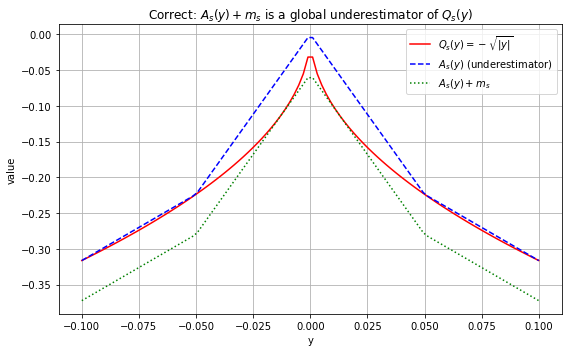

In [13]:
# y and z = |y|
y_vals = np.linspace(-delta, delta, 100)
z_vals = np.abs(y_vals)

# define Qs(y)
Qs_vals1 = -np.sqrt(z_vals)

# As(y)
y_nodes = np.array(y_nodes)
z_nodes = abs(y_nodes)
as_nodes = -np.sqrt(z_nodes)
As_vals1 = np.interp(z_vals, y_nodes, as_nodes)
# As + ms
As_shifted_vals1 = As_vals1 + m_s1

# make the plot
plt.figure(figsize=(8, 5))
plt.plot(y_vals, Qs_vals1, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
plt.plot(y_vals, As_vals1, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
plt.plot(y_vals, As_shifted_vals1, label=r'$A_s(y) + m_s$', color='green', linestyle=':')
plt.xlabel('y')
plt.ylabel('value')
plt.title('Correct: $A_s(y) + m_s$ is a global underestimator of $Q_s(y)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# v2 = min x_2

In [17]:
# define sampling nodes
y_nodes = np.linspace(-delta, delta, n_samples).tolist()
as_nodes = [np.sqrt(abs(y)) for y in y_nodes]


# define model
model = ConcreteModel()
model.x2 = Var(bounds=(0, 1))
model.y = Var(bounds=(-delta, delta))

# define piecewise function
model.As = Var()
model.pw = Piecewise(
    model.As, model.y,
    pw_pts=y_nodes,
    f_rule=as_nodes,
    pw_constr_type='EQ',
    pw_repn='INC'
)

# set up constraint
model.c1 = Constraint(expr=model.x2**2 >= model.y)
model.c2 = Constraint(expr=model.x2**2 >= -model.y)

# define objective function and solve the model
model.obj = Objective(expr=model.x2 - model.As, sense=minimize)
solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
solver.solve(model)

# print the output
x2_opt = value(model.x2)
y_opt = value(model.y)
as_val = value(model.As)
m_s2 = value(model.obj)
print(f"x2 = {x2_opt:.4f}, y = {y_opt:.4f}, A_s(y) = {as_val:.4f}, m_s = {m_s2:.4f}")

x2 = 0.2236, y = -0.0500, A_s(y) = 0.2236, m_s = -0.0000


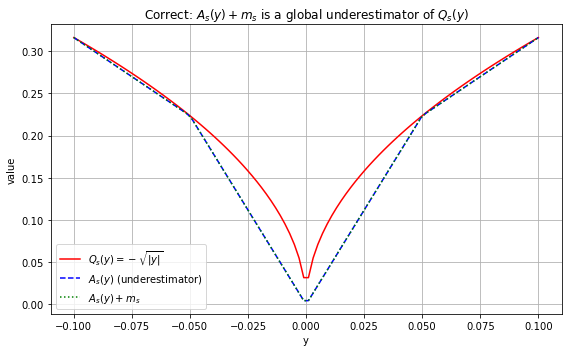

In [18]:
# y and z = |y|
y_vals = np.linspace(-delta, delta, 100)
z_vals = np.abs(y_vals)

# define Qs(y)
Qs_vals2 = np.sqrt(z_vals)

# As(y)
y_nodes = np.array(y_nodes)
z_nodes = abs(y_nodes)
as_nodes = np.sqrt(z_nodes)
As_vals2 = np.interp(z_vals, y_nodes, as_nodes)
As_shifted_vals2 = As_vals2 + m_s2

# make the plot
plt.figure(figsize=(8, 5))
plt.plot(y_vals, Qs_vals2, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
plt.plot(y_vals, As_vals2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
plt.plot(y_vals, As_shifted_vals2, label=r'$A_s(y) + m_s$', color='green', linestyle=':')
plt.xlabel('y')
plt.ylabel('value')
plt.title('Correct: $A_s(y) + m_s$ is a global underestimator of $Q_s(y)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

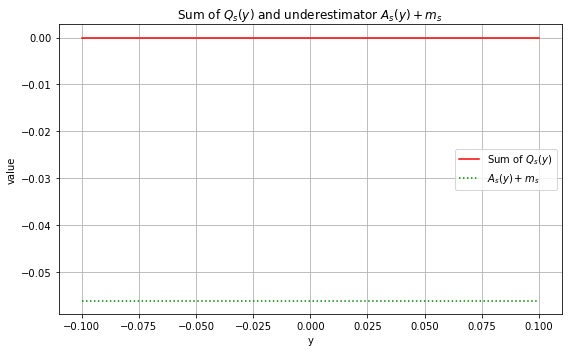

In [19]:
# make the plot
plt.figure(figsize=(8, 5))
plt.plot(y_vals, Qs_vals1+Qs_vals2, label=r'Sum of $Q_s(y)$', color='red')
plt.plot(y_vals, As_shifted_vals1+As_shifted_vals2, label=r'$A_s(y) + m_s$', color='green', linestyle=':')
plt.xlabel('y')
plt.ylabel('value')
plt.title('Sum of $Q_s(y)$ and underestimator $A_s(y) + m_s$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# hausdorff error plot for 5 nodes 

/opt/anaconda3/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


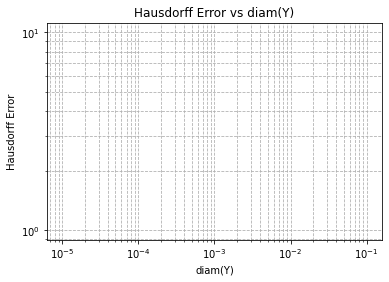

[(0.1, -0.3723079268387921), (0.01, -0.12482508918617341), (0.001, -0.053266520954561615), (0.0001, -0.02027725395893988), (1e-05, -0.009043349650483395)]


In [9]:
def v_1(y):  
    return - np.sqrt(np.abs(y))

def v_2(y): 
    return np.sqrt(np.abs(y))

def compute_piecewise_hausdorff(delta, n_samples=5):
    #y_nodes = np.linspace(-delta, delta, n_samples)
    y_nodes = np.linspace(-delta, delta, n_samples).tolist()
    as1_nodes = [v_1(y) for y in y_nodes]
    as2_nodes = [v_2(y) for y in y_nodes]
    assum_nodes = as1_nodes + as2_nodes
    
    # create model for v1
    model1 = ConcreteModel()
    model1.x1 = Var(bounds=(0, 1))
    model1.y = Var(bounds=(-delta, delta))
    # define piecewise function
    model1.As = Var()
    model1.pw = Piecewise(
        model1.As, model1.y,
        pw_pts=y_nodes,
        f_rule=as1_nodes,
        pw_constr_type='EQ',
        pw_repn='INC'
    )
    # set up constraint
    model1.eq = Constraint(expr=model1.x1**4 == model1.y**2)
    # define objective function and solve the model
    model1.obj = Objective(expr= -model1.x1 - model1.As, sense=minimize)
    solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
    solver.solve(model1)
    # print the output
    as1_val = value(model1.As)
    m_s1 = value(model1.obj)
    
    
    
    # define model for v2
    model2 = ConcreteModel()
    model2.x2 = Var(bounds=(0, 1))
    model2.y = Var(bounds=(-delta, delta))
    # define piecewise function
    model2.As = Var()
    model2.pw = Piecewise(
        model2.As, model2.y,
        pw_pts=y_nodes,
        f_rule=as2_nodes,
        pw_constr_type='EQ',
        pw_repn='INC'
    )
    # set up constraint
    model2.c1 = Constraint(expr=model2.x2**2 >= model2.y)
    model2.c2 = Constraint(expr=model2.x2**2 >= -model2.y)
    # define objective function and solve the model
    model2.obj = Objective(expr=model2.x2 - model2.As, sense=minimize)
    solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
    solver.solve(model2)
    # print the output
    as2_val = value(model2.As)
    m_s2 = value(model2.obj)

    
    # output Hausdorff error
    #test_ys = np.linspace(-delta, delta, 100)
    #piecewise_interp = lambda y: np.interp(y, y_nodes, as_nodes)
    modelsum = ConcreteModel()
    modelsum.y = Var(bounds=(-delta, delta))
    # define piecewise function
    modelsum.As = Var()
    modelsum.pw = Piecewise(
        modelsum.As, modelsum.y,
        pw_pts=y_nodes,
        f_rule=assum_nodes,
        pw_constr_type='EQ',
        pw_repn='INC'
    )
    # set up constraint
    modelsum.obj = Objective(expr= modelsum.As, sense=minimize)
    solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
    solver.solve(modelsum)
    # print the output
    errors = value(modelsum.obj)+m_s1 + m_s2

    return delta, errors  # diameter, error

# make delta list
deltas = np.array([1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
results = [compute_piecewise_hausdorff(d) for d in deltas]

# make the plot
diameters, errors = zip(*results)
plt.loglog(diameters, errors, marker='o', color='blue')
plt.xlabel("diam(Y)")
plt.ylabel("Hausdorff Error")
plt.title("Hausdorff Error vs diam(Y)")
plt.grid(True, which="both", ls="--")
plt.show()

print(results)

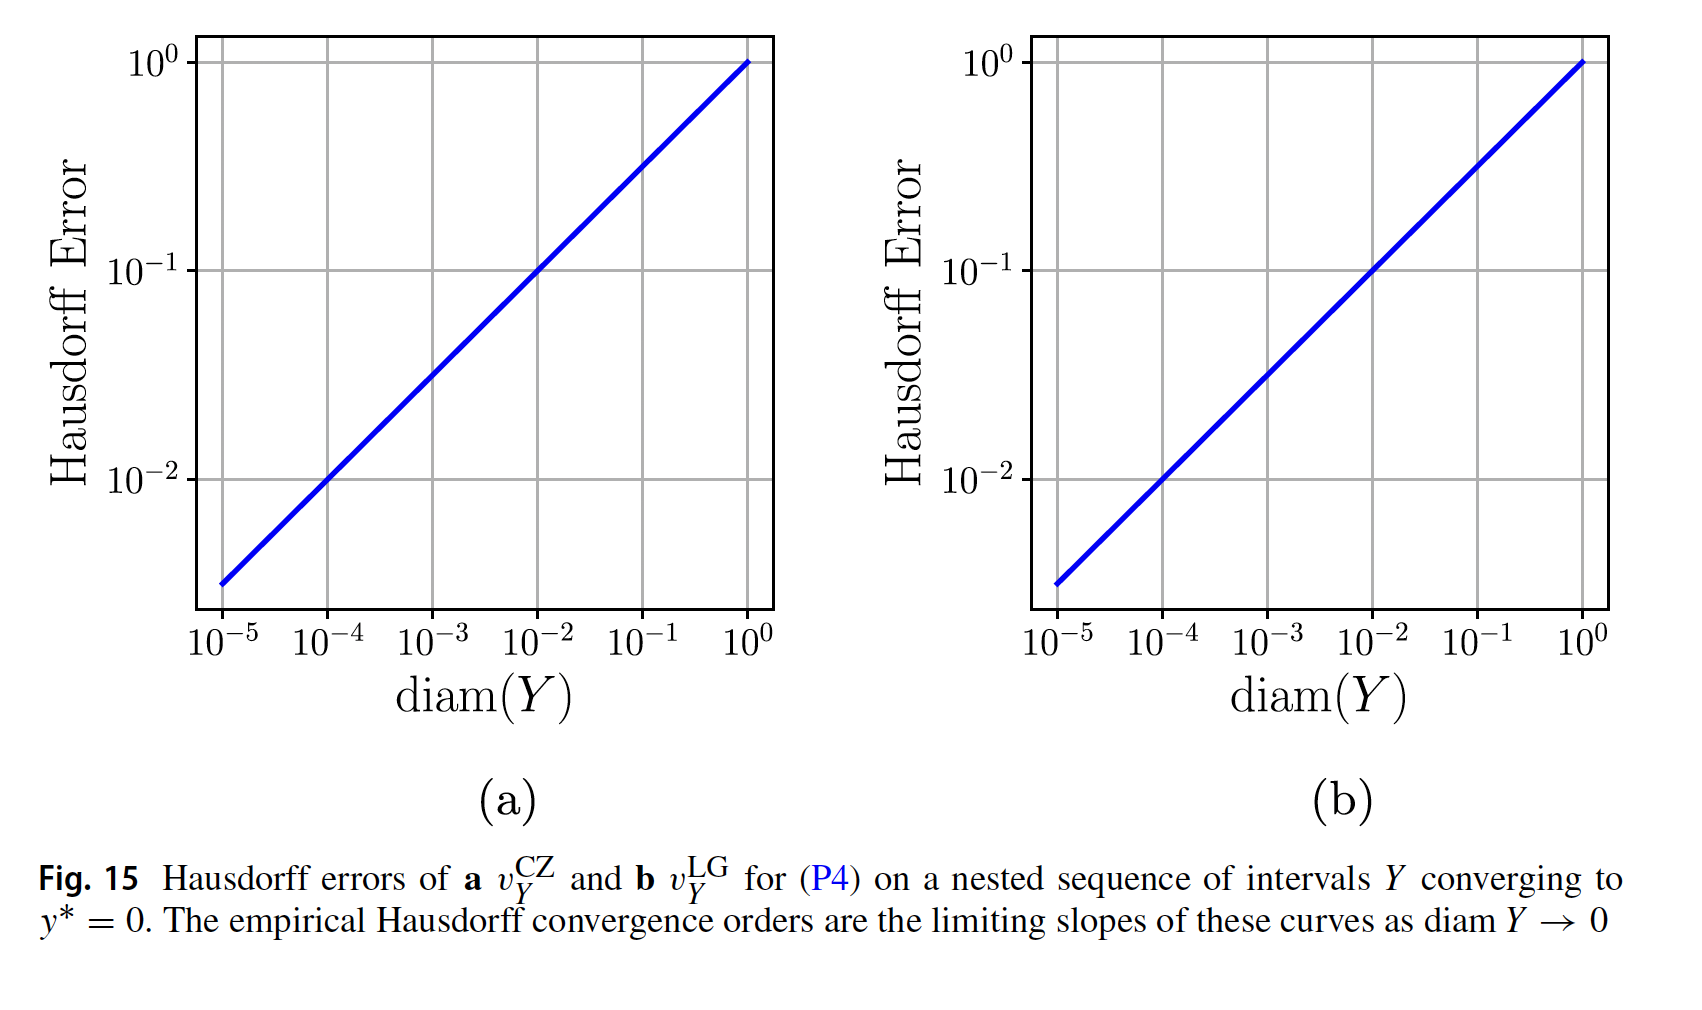

In [70]:
print(results)

[(0.1, 0.3162277854522382), (0.01, 0.10000026195524515), (0.001, 0.03092359654315482), (0.0001, 0.010241183441382048), (1e-05, 0.005759049208233985)]


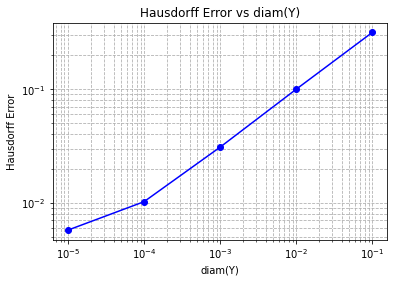

In [69]:
deltas = np.array([1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
results = [compute_piecewise_hausdorff(d) for d in deltas]

# make the plot
diameters, errors = zip(*results)
plt.loglog(diameters, errors, marker='o', color='blue')
plt.xlabel("diam(Y)")
plt.ylabel("Hausdorff Error")
plt.title("Hausdorff Error vs diam(Y)")
plt.grid(True, which="both", ls="--")
plt.show()

# hausdorff error plot for 10 nodes 

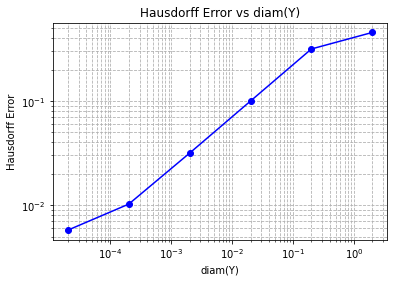

In [64]:
def compute_piecewise_hausdorff(delta, n_samples=10):
    y_nodes = np.linspace(-1, 1, 10).tolist()
    as1_nodes = [v_1(y) for y in y_nodes]
    as2_nodes = [v_2(y) for y in y_nodes]
    
    # create model for v1
    model1 = ConcreteModel()
    model1.x1 = Var(bounds=(0, 1))
    model1.y = Var(bounds=(-delta, delta))
    # define piecewise function
    model1.As = Var()
    model1.pw = Piecewise(
        model1.As, model1.y,
        pw_pts=y_nodes,
        f_rule=as1_nodes,
        pw_constr_type='EQ',
        pw_repn='INC'
    )
    # set up constraint
    model1.eq = Constraint(expr=model1.x1**4 == model1.y**2)
    # define objective function and solve the model
    model1.obj = Objective(expr= -model1.x1 - model1.As, sense=minimize)
    solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
    solver.solve(model1)
    # print the output
    as1_val = value(model1.As)
    m_s1 = value(model1.obj)
    
    
    # define mode for v2
    model2 = ConcreteModel()
    model2.x2 = Var(bounds=(0, 1))
    model2.y = Var(bounds=(-delta, delta))
    # define piecewise function
    model2.As = Var()
    model2.pw = Piecewise(
        model2.As, model2.y,
        pw_pts=y_nodes,
        f_rule=as2_nodes,
        pw_constr_type='EQ',
        pw_repn='INC'
    )
    # set up constraint
    model2.c1 = Constraint(expr=model2.x2**2 >= model2.y)
    model2.c2 = Constraint(expr=model2.x2**2 >= -model2.y)
    # define objective function and solve the model
    model2.obj = Objective(expr=model2.x2 - model2.As, sense=minimize)
    solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
    solver.solve(model2)
    # print the output
    as2_val = value(model2.As)
    m_s2 = value(model2.obj)

    # output Hausdorff error
    test_ys = np.linspace(-delta, delta, 100)
    piecewise_interp = lambda y: np.interp(y, y_nodes, as_nodes)
    errors = -(as1_val + m_s1 + as2_val + m_s2)

    return delta * 2, errors  # diameter, error

# make delta list
deltas = np.array([1e-0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
results = [compute_piecewise_hausdorff(d) for d in deltas]

# make the plot
diameters, errors = zip(*results)
plt.loglog(diameters, errors, marker='o', color='blue')
plt.xlabel("diam(Y)")
plt.ylabel("Hausdorff Error")
plt.title("Hausdorff Error vs diam(Y)")
plt.grid(True, which="both", ls="--")
plt.show()

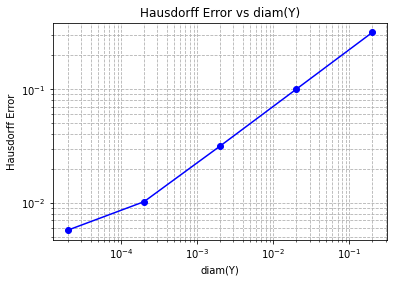

In [65]:
# make delta list
deltas = np.array([1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
results = [compute_piecewise_hausdorff(d) for d in deltas]

# make the plot
diameters, errors = zip(*results)
plt.loglog(diameters, errors, marker='o', color='blue')
plt.xlabel("diam(Y)")
plt.ylabel("Hausdorff Error")
plt.title("Hausdorff Error vs diam(Y)")
plt.grid(True, which="both", ls="--")
plt.show()